In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from noise_correlations import discriminability, null_models, plot, utils
from imp import reload

# From data

In [51]:
rng = np.random.RandomState(20190220)
deltas = np.logspace(-1.5, 0, 10)
rotations = 20
samples = 10000

angle = -np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[2.5, 0.], [0., .5]])).dot(r.T)
cov1 = cov0

In [61]:
nulls_data = [null_models.shuffle_data, null_models.random_rotation_data]
null_names_data = ['Shuffle', 'Rotation']

measures_data = [discriminability.lfi_data, discriminability.mv_normal_jeffreys_data]
measure_names_data = ['LFI', r'$\mathregular{sD}_\mathregular{KL}$']

orig_vals_data = np.zeros((len(nulls_data), len(measures_data), deltas.size, rotations))
all_vals_data = np.zeros((len(nulls_data), len(measures_data), deltas.size, rotations, samples))

size = 20

R1s = []
R2s = []
for nn in range(samples):
    angle = 2. * np.pi * rng.rand()
    R = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
    R1s.append(R)
    angle = 2. * np.pi * rng.rand()
    R = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
    R2s.append(R)

for ii, delta in enumerate(deltas):
    print(ii, deltas.size)
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    for kk in range(rotations):
        x0_zm = rng.multivariate_normal([0., 0.], cov0, size=size)
        x1_zm = rng.multivariate_normal([0., 0.], cov1, size=size)
        angle = 2. * np.pi * rng.rand()
        r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
        x0 = x0_zm.dot(r) + mu0[np.newaxis]
        angle = 2. * np.pi * np.random.rand()
        r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
        x1 = x1_zm.dot(r) + mu1[np.newaxis]
        # Shuffle
        o_vals, vals, _ = null_models.eval_null_data(x0, x1, null_models.shuffle_data, measures_data, samples)
        all_vals_data[0, :, ii, kk] = vals
        orig_vals_data[0, :, ii, kk] = o_vals
        orig_vals_data[1, :, ii, kk] = [m(x0, x1) for m in measures_data]
        all_vals = np.zeros((2, samples))
        for jj in range(samples):
            r1 = R1s[jj]
            r2 = R2s[jj]
            x0 = x0_zm.dot(r1) + mu0[np.newaxis]
            x1 = x1_zm.dot(r2) + mu1[np.newaxis]
            all_vals[:, jj] = [m(x0, x1) for m in measures_data]
        all_vals_data[1, :, ii, kk] = all_vals
all_vals_data = np.concatenate([orig_vals_data[..., np.newaxis], all_vals_data], axis=-1)

0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10


In [62]:
ps = (all_vals_data >= orig_vals_data[..., np.newaxis]).mean(axis=-1)

In [63]:
np.savez('ps', ps=ps)

In [24]:
ps = np.load('ps.npz')['ps']

In [64]:
ps = np.load('ps.npz')['ps']
ps_max = np.load('ps_max.npz')['ps']
ps_kohn = np.load('ps_kohn_pvc-11.npz')['ps']

Bbox(x0=0.07, y0=0.15, x1=0.3333333333333333, y1=0.85)
Bbox(x0=0.3933333333333333, y0=0.15, x1=0.6566666666666666, y1=0.85)
Bbox(x0=0.7166666666666666, y0=0.15, x1=0.9799999999999999, y1=0.85)


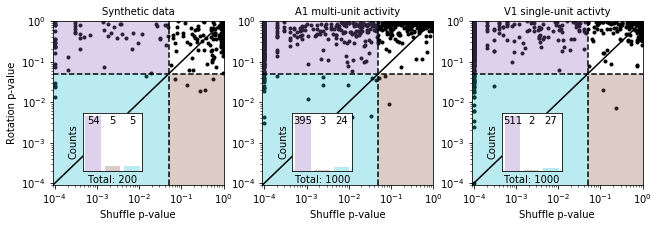

In [29]:
reload(plot)
f = plt.figure(figsize=(9, 3.25))
te = .15
be = .15
le = .07
re = .02
hg = .06
h = 1. - be - te
w = (1. - le - re - 2*hg) / 3
ax0 = f.add_axes([le, be, w, h])
ax1 = f.add_axes([le+w+hg, be, w, h])
ax2 = f.add_axes([le+2.*(w+hg), be, w, h])

plot.plot_pvalue_comparison(ps[0, 0].ravel(), ps[1, 0].ravel(), ['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax0), m=9e-5)
ax0.set_title('Synthetic data', fontsize=10)

plot.plot_pvalue_comparison(ps_max[0, 0], ps_max[1, 0], ['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax1), m=9e-5)
ax1.set_title('A1 multi-unit activity', fontsize=10)
ax1.set_ylabel('')

plot.plot_pvalue_comparison(ps_kohn[0, 0], ps_kohn[1, 0], ['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax2), m=9e-5)
ax2.set_title('V1 single-unit activty', fontsize=10)
ax2.set_ylabel('')

plt.savefig('null_results.pdf', dpi=300)

Bbox(x0=0.07, y0=0.15, x1=0.3333333333333333, y1=0.85)
Bbox(x0=0.3933333333333333, y0=0.15, x1=0.6566666666666666, y1=0.85)
Bbox(x0=0.7166666666666666, y0=0.15, x1=0.9799999999999999, y1=0.85)


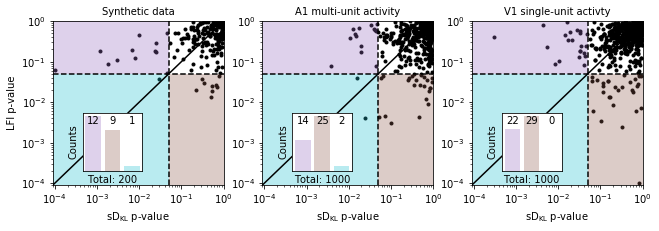

In [30]:
reload(plot)
f = plt.figure(figsize=(9, 3.25))
te = .15
be = .15
le = .07
re = .02
hg = .06
h = 1. - be - te
w = (1. - le - re - 2*hg) / 3
ax0 = f.add_axes([le, be, w, h])
ax1 = f.add_axes([le+w+hg, be, w, h])
ax2 = f.add_axes([le+2.*(w+hg), be, w, h])
labels = [r'$\mathregular{sD}_\mathregular{KL}$ p-value', 'LFI p-value']

plot.plot_pvalue_comparison(ps[1, 1].ravel(), ps[1, 0].ravel(), labels, faxes=(f, ax0), m=9e-5)
ax0.set_title('Synthetic data', fontsize=10)

plot.plot_pvalue_comparison(ps_max[1, 1], ps_max[1, 0], labels, faxes=(f, ax1), m=9e-5)
ax1.set_title('A1 multi-unit activity', fontsize=10)
ax1.set_ylabel('')

plot.plot_pvalue_comparison(ps_kohn[1, 1], ps_kohn[1, 0], labels, faxes=(f, ax2), m=9e-5)
ax2.set_title('V1 single-unit activty', fontsize=10)
ax2.set_ylabel('')

plt.savefig('measure_null_results.pdf', dpi=300)

# Uniformly Sampled

In [8]:
d = np.load('ps2_max.npz')
ps_max = d['ps']
df_max = d['df']
d = np.load('ps2_kohn_pvc-11.npz')
ps_kohn = d['ps']
df_kohn = d['df']
ps_max[ps_max == 0] = ps_max[ps_max > 0.].min()
ps_kohn[ps_kohn == 0] = ps_kohn[ps_kohn > 0.].min()

In [9]:
ps_max.shape

(2, 2, 1000)

In [10]:
df_max.shape

(1000,)

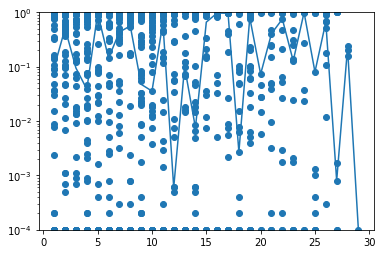

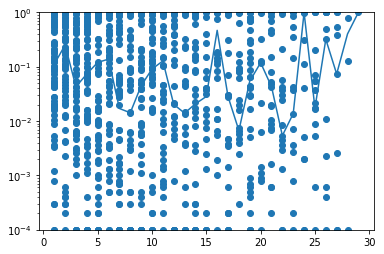

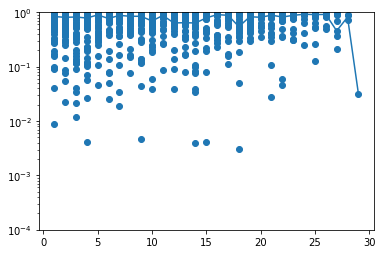

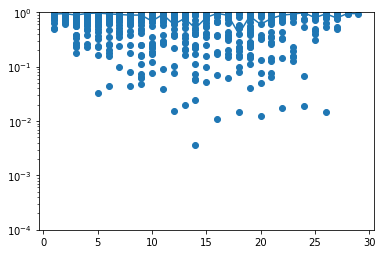

In [20]:
dfs = np.unique(abs(df_max))
for ii in range(2):
    for jj in range(2):
        x = abs(df_max)
        y = ps_max[ii, jj]
        y_median = np.zeros_like(dfs).astype(float)
        for kk, df in enumerate(dfs):
            idxs = np.nonzero(df_max == df)
            y_median[kk] = np.median(y[idxs])
        plt.figure()
        plt.scatter(abs(df_max), y)
        plt.plot(dfs, y_median)
        plt.yscale('log')
        plt.ylim(1e-4, 1)

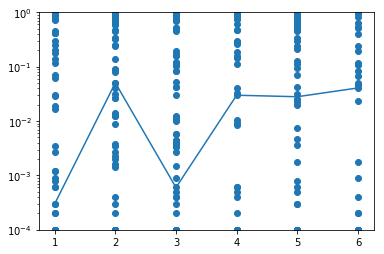

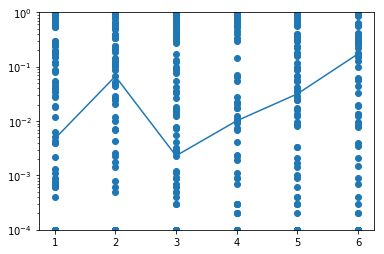

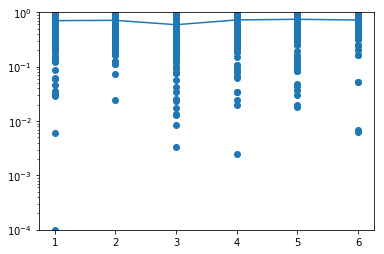

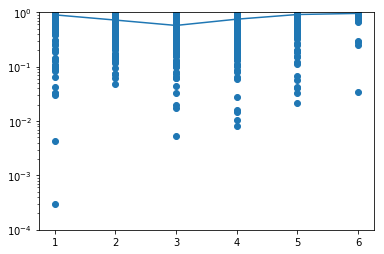

In [22]:
dfs = np.unique(abs(df_kohn))
for ii in range(2):
    for jj in range(2):
        x = abs(df_kohn)
        y = ps_kohn[ii, jj]
        y_median = np.zeros_like(dfs).astype(float)
        for kk, df in enumerate(dfs):
            idxs = np.nonzero(df_kohn == df)
            y_median[kk] = np.median(y[idxs])
        plt.figure()
        plt.scatter(abs(df_kohn), y)
        plt.plot(dfs, y_median)
        plt.yscale('log')
        plt.ylim(1e-4, 1)